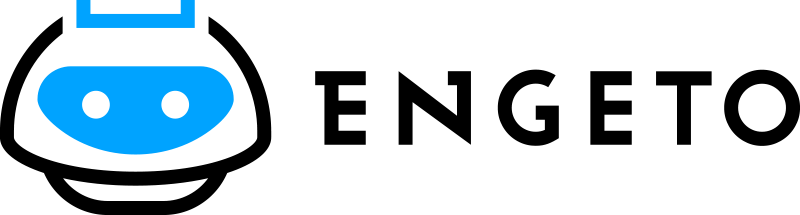

## Kde najdete materiály?

Na portalu engeta - https://learn.engeto.com/

#Připojení k databázi

Budeme používat software DBeaver.

##Relační databáze

V relační databázi jsou data uspořádaná do tabulek, které řádků a sloupců. 

Strukturování dat tímto způsobem zajišťuje efektivní a flexibilní přístup, a proto jsou relační databáze tím nejběžnějším typem. 

Relační databáze jsou navíc vytvořené tak, aby dokázaly porozumět standardizovanému programovacímu jazyku SQL (Structured Query Language), který slouží k ukládání, úpravě a načítání dat. 

Co znamená relační? Slovo relační znamená označující nebo tvořící vztah.

SQL - (Structured Query Language) pro standardizovaný strukturovaný dotazovací jazyk, který je používán pro práci s daty v relačních databázích.

SQL Relační databáze je typem databáze, který ukládá a organizuje datové body s definovanými vztahy, aby se k nim zajistil rychlý přístup. 



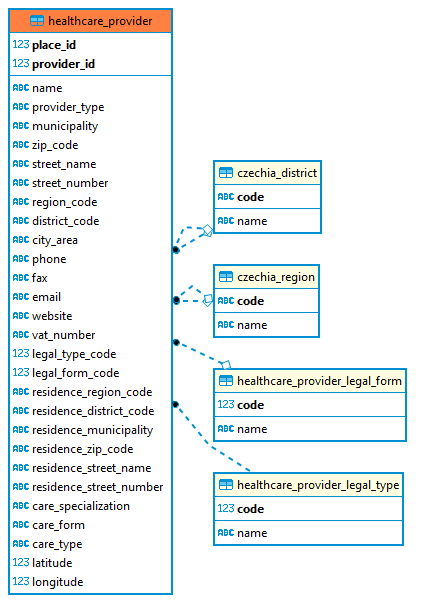

## Microsoft SQL Server

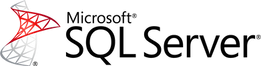



Aktuální verze 2022 od listopadu 2022.

Vy máte verzi 2016 - Standard Edition, konec podpory v půlce 2026.

Podpora R – R je jazyk, který používají datoví specialisté a slouží k pokročilým analýzám dat.

SQL Server používá T-SQL (Transact Structured Query Language) - proceduální jazyk

## Připojení pomocí DBeaveru

Máme připravenou databázi, ke které se můžeš připojit pomocí libovolného nástroje pro komunikaci s databázovými systémy (například DBeaver). 

Stačí vyplnit údaje pro nové připojení a můžeme začít se cvičeními v dalších lekcích. 

##Údaje pro připojení:

**server**: SRV477DEV.TDA01.POJ

**port**: 1433

**název databáze**: SKOLENI_DT

**schéma**: dbo

**uživatel**: zak_dt_**XX**

**heslo**: 🌝 --vase heslo-- 🌝

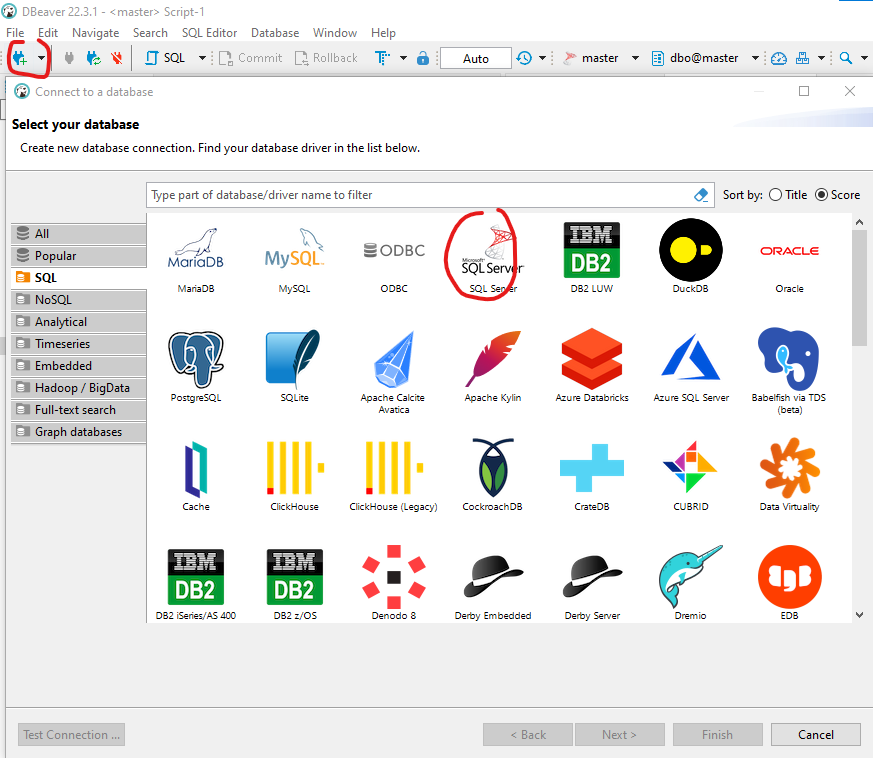

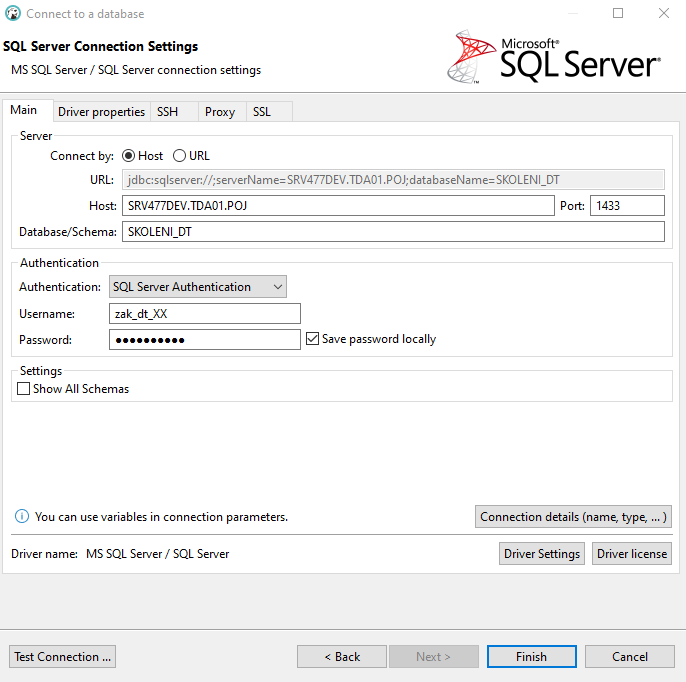

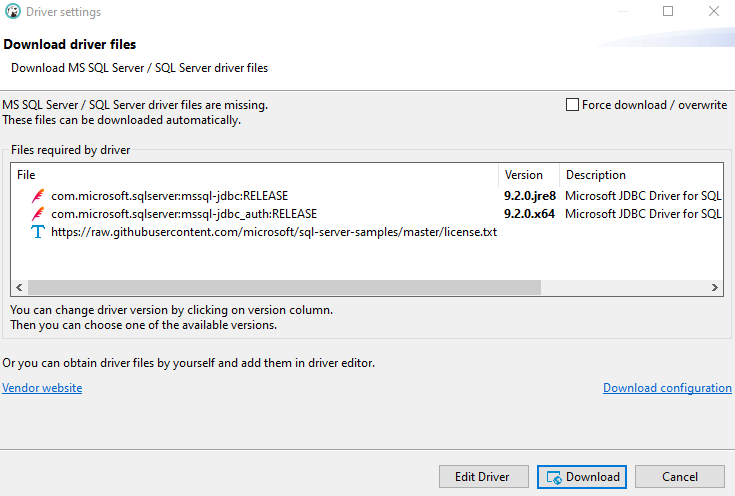

#Popis datových sad
Pro cvičení z SQL používáme data uložená v databázi. Data obsahují informace z několika oblastí. Nyní si popíšeme tabulky, se kterými budeme pracovat:

Číselníky sdílených informací o ČR:

* **czechia_region** – Číselník krajů České republiky dle normy CZ-NUTS 2.
* **czechia_district** – Číselník okresů České republiky dle normy LAU.

Datová sada poskytovatelů zdravotních služeb České republiky:

* **healthcare_provider** – Informace o poskytovatelích zdravotních služeb z listopadu roku 2021. Datová sada pochází z Portálu otevřených dat ČR.
* **healthcare_provider_legal_form** – Číselník právních forem poskytovatelů zdravotních služeb.
* **healthcare_provider_legal_typ** – Číselník typů osob poskytovatelů zdravotních služeb.

Datové sady pro porovnání příjmů a cen vybraných potravin:

* **czechia_payroll** – Informace o mzdách v různých odvětvích za několikaleté období. Datová sada pochází z Portálu otevřených dat ČR.
* **czechia_payroll_calculation** – Číselník kalkulací v tabulce mezd.
* **czechia_payroll_industry_branch** – Číselník odvětví v tabulce mezd.
* **czechia_payroll_unit** – Číselník jednotek hodnot v tabulce mezd.
* **czechia_payroll_value_type** – Číselník typů hodnot v tabulce mezd.
* **czechia_price** – Informace o cenách vybraných potravin za několikaleté období. Datová sada pochází z Portálu otevřených dat ČR.
* **czechia_price_category** – Číselník kategorií potravin, které se vyskytují v našem přehledu.

Dále máme data o zemích světa, ty jsou v následujících tabulkách:

* **countries** - všemožné informace o zemích na světě, například hlavní město, měna, národní jídlo nebo průměrná výška populace
* **demographics** - populace, porodnost, úmrtnost... pro daný stát a rok
* **economies** - HDP, gini, daňová zátěž... pro daný stát a rok
* **religions** - počty příslušníků světových náboženství v jednotlivých státech a letech
* **life_expectancy** - očekávaná délka života pro daný stát a rok


#SELECT, ORDER BY a TOP(LIMIT)

### Úkol 1

Vypište pouze sloupce se jménem a typem poskytovatele z tabulky `healthcare_provider` a pouze prvních 20 záznamů v tabulce.

In [ ]:
# T-SQL 

SELECT
    TOP 20
    name, 
    provider_type
FROM healthcare_provider;

In [ ]:
# prvních 20 procent

SELECT
    TOP 20 PERCENT
    name, 
    provider_type
FROM healthcare_provider;


###Úkol 2

Vypište od všech poskytovatelů zdravotních služeb ID, jméno a typ. 

Záznamy seřaďte primárně podle kódu kraje a sekundárně podle kódu okresu.

In [ ]:
# T-SQL 

SELECT
    provider_id, 
    name, 
    provider_type
FROM healthcare_provider
ORDER BY region_code, district_code;

### Úkol 3

Upravte předchozí dotaz z úkolu 1., že vyberete pouze 10 záznamů a prvních 5 přeskočíte.

In [ ]:
# T-SQL 

SELECT
    name,
    region_code,
    district_code
FROM healthcare_provider
ORDER BY district_code DESC
OFFSET 5 ROWS
FETCH NEXT 10 ROWS ONLY;

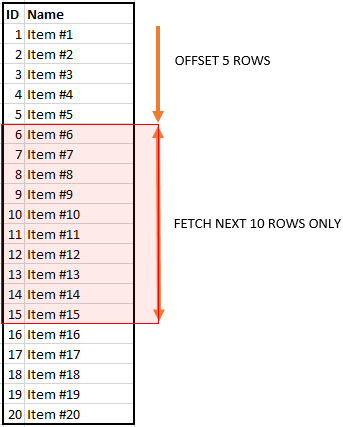

In [ ]:
# SQL - toto nefunguje v MS SQL

SELECT
    name,
    region_code,
    district_code
FROM healthcare_provider
ORDER BY district_code DESC
LIMIT 10 OFFSET 5;

#WHERE, IN a LIKE

Porovnávací operátory - https://learn.microsoft.com/en-us/sql/t-sql/language-elements/comparison-operators-transact-sql?view=sql-server-ver16

###Úkol 1 

Vyberte z tabulky healthcare_provider všechny záznamy poskytovatelů zdravotních služeb, kteří poskytují služby v Praze (kraj Praha).

In [ ]:
SELECT 
    *
FROM healthcare_provider
WHERE 
    region_code = 'CZ010';

##Úkol 2
Vyberte z tabulky `healthcare_provider` záznamy o poskytovatelích, kteří mají ve jméně slovo nemocnice.

Dokumentace k LIKE - https://learn.microsoft.com/en-us/sql/t-sql/language-elements/like-transact-sql?view=sql-server-ver16

In [ ]:
SELECT
    *
FROM healthcare_provider
WHERE name LIKE '%nemocnice%';

In [ ]:
SELECT 
    name,
    LOWER(name) AS lower_name,
    UPPER(name) AS upper_name
FROM healthcare_provider 
WHERE LOWER(name) LIKE '%nemocnice%'; 

##Úkol 3
Vypište jméno, město a okres místa poskytování u těch poskytovatelů, kteří jsou z okresů Most nebo Děčín.

Výpis všech okresů:



In [ ]:
SELECT *
FROM czechia_district;

In [ ]:
SELECT
    name, 
    municipality, 
    district_code
FROM healthcare_provider
WHERE 
    district_code IN ('CZ0425', 'CZ0421');

#Agregační funkce COUNT, SUM, MAX, MIN, aj.

##Úkol 1
Spočítejte počet řádků v tabulce `czechia_payroll` s konkrétním sloupcem jako argumentem funkce COUNT().



In [ ]:
SELECT 
    COUNT(id) AS rows_count
FROM czechia_payroll;

vs. nesprávné řešení se sloupcem, který má v hodnotách NULL



In [ ]:
SELECT 
    COUNT(value) AS rows_count
FROM czechia_payroll;

##Úkol 2
Vypište všechny cenové kategorie z tabulky `czechia_price` a vyzkoušejte si agregační funkce.


In [ ]:

SELECT
    category_code,
    COUNT(id) AS rows_in_category,
    SUM(value) AS value_sum,
    MAX(value) AS value_max,
    MIN(value) AS value_min
FROM czechia_price
GROUP BY category_code;


`GROUP BY` klauzule se používá (ve spojení s agregačními funkcemi) pro seskupování dat podle určitých vlastností.

Zkuste si i přidat klauzuli `HAVING` a vyfiltrujte pouze kategorie, co mají počet řádků v kategorii více než 4000.

In [ ]:

SELECT
    category_code,
    COUNT(id) AS rows_in_category,
    SUM(value) AS value_sum,
    MAX(value) AS value_max,
    MIN(value) AS value_min
FROM czechia_price
GROUP BY category_code
HAVING COUNT(id) > 4000;


#Další operace

##Úkol 1

Vyzkoušejte si spustit dotazy, jež operují s textovými řetězci.

In [ ]:
SELECT CONCAT('Hi, ', 'Engeto lektor here!');

FUNKCE SUBSTRING (expression, start, length)  

In [ ]:
# T-SQL
SELECT name,
    SUBSTRING(name, 1, 2) AS prefix,
    REVERSE(SUBSTRING(REVERSE(name), 1, 2)) AS suffix,
    LEN(name)         
FROM czechia_price_category;

In [ ]:
# SQL
SELECT name,
    SUBSTRING(name, 1, 2) AS prefix,
    SUBSTRING(name, -2, 2) AS suffix, 
    LEN(name)         
FROM czechia_price_category;

##Úkol 2
Pomocí operátoru WITH (Common Table Expression - CTE) připravte tabulku s cenami nad 150 Kč. 

S její pomocí následně vypište jména takových kategorií potravin, které do této cenové hladiny spadají.



In [ ]:
WITH high_price AS (
    SELECT category_code AS code
    FROM czechia_price
    WHERE value > 150
)
SELECT cpc.name
FROM czechia_price_category cpc
WHERE cpc.code IN (
    SELECT code 
    FROM high_price hp
);


In [ ]:
WITH high_price AS (
    SELECT DISTINCT category_code AS code
    FROM czechia_price
    WHERE value > 150
)
SELECT cpc.name
FROM high_price hp
JOIN czechia_price_category cpc
    ON hp.code = cpc.code;

#CASE Expression

Výraz `CASE` prochází podmínkami a vrací hodnotu, když je splněna první podmínka (jako příkaz `if-then-else`). 

Jakmile je tedy podmínka splněna, přestane číst a vrátí výsledek. 

Pokud nejsou splněny žádné podmínky, vrátí hodnotu v `ELSE` klauzuli.

Pokud neexistuje žádná `ELSE` část a nejsou splněny žádné podmínky, vrátí hodnotu `NULL`.


##Úkol 1
Přidejte na výpisu k tabulce healthcare_provider nový sloupec `is_from_prague`, který bude obsahovat 1 pro poskytovate z Prahy a 0 pro ty mimo pražské.



In [ ]:
SELECT
    *,
    CASE
        WHEN region_code = 'CZ010' THEN 1
        ELSE 0
    END AS is_from_prague
FROM healthcare_provider;

##Úkol 2
Vypište název a typ poskytovatele a v novém sloupci odlište, zda jeho typ je `Lékárna` nebo `Výdejna zdravotnických prostředků`.



In [ ]:

SELECT
    name, 
    provider_type,
    CASE
        WHEN provider_type = 'Lékárna' THEN 1 
        WHEN provider_type = 'Výdejna zdravotnických prostředků' THEN 1
        ELSE 0
    END AS is_desired_type
FROM healthcare_provider;


#Spojování tabulek pomocí JOIN

##Proč spojovat tabulky

V relační databázi jsou data distribuována ve více logických tabulkách. 

Chceme z databáze dostat odpovědi na komplexní otázky.

Můžeme data dávat do společného kontextu.

Oddělená data opět spojujeme dohromady, ale jenom pro daný moment – nevytváříme redundanci (zbytečné opakování).


##Typy spojení




Máme více typů spojení v kontextu prázdných hodnot (NULL).

###Kartézský součin (každý s každým)


###(INNER) JOIN
Vrátí záznamy, které mají shodné hodnoty v obou tabulkách.

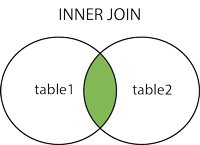

###LEFT (OUTER) JOIN
Vrátí všechny záznamy z levé tabulky a odpovídající záznamy z pravé tabulky.

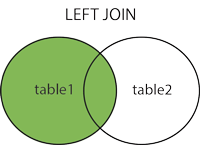

###RIGHT (OUTER) JOIN
Vrátí všechny záznamy z pravé tabulky a odpovídající záznamy z levé tabulky.

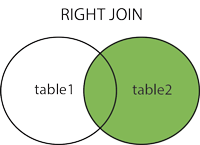

###FULL (OUTER) JOIN
Vrátí všechny záznamy, pokud existuje shoda v levé nebo pravé tabulce.

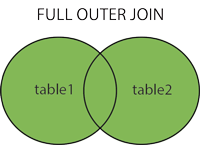

##Úkol 1
Spojte tabulky `czechia_price` a `czechia_price_category`. 

Vypište ID a jméno kategorie potravin a cenu a tabulky přejmenujte.


In [ ]:

SELECT
    cp.id, 
    cpc.name, 
    cp.value
FROM czechia_price AS cp
JOIN czechia_price_category AS cpc
    ON cpc.code = cp.category_code;
    

##Úkol 2
Přidejte k tabulce cen potravin i informaci o krajích ČR a vypište informace o cenách společně s názvem kraje.



In [ ]:

SELECT
    cp.*, cr.name
FROM czechia_price AS cp
LEFT JOIN czechia_region AS cr
    ON cp.region_code = cr.code;


Rozdíl v počtech řádků levého a vnitřního spojení:

In [ ]:

SELECT 
    COUNT(1) AS total_number_of_rows
FROM czechia_price cp
LEFT JOIN czechia_region cr
    ON cp.region_code = cr.code;


In [ ]:

SELECT 
    COUNT(1) AS total_number_of_rows
FROM czechia_price cp
JOIN czechia_region cr
    ON cp.region_code = cr.code;
    

##Úkol 3

Využijte v příkladě z předchozího úkolu RIGHT JOIN s výměnou pořadí tabulek. 

Jak se změní výsledky?

In [ ]:
SELECT
    cp.*, cr.name
FROM czechia_region AS cr
RIGHT JOIN czechia_price AS cp
    ON cp.region_code = cr.code;


Výsledný výpis se nějak nezmění. Dotazy jsou ekvivalentní.

##Úkol 4
K tabulce `czechia_payroll` připojte všechny okolní tabulky. Využijte ERD model ke zjištění, které to jsou.



In [ ]:

SELECT *
FROM czechia_payroll cp
JOIN czechia_payroll_calculation cpc
    ON cp.calculation_code = cpc.code
JOIN czechia_payroll_industry_branch cpib
    ON cp.industry_branch_code = cpib.code
JOIN czechia_payroll_unit cpu
    ON cp.unit_code = cpu.code
JOIN czechia_payroll_value_type cpvt
    ON cp.value_type_code = cpvt.code;
    

#Množinové operace

##Typy spojení


###Sjednocení - UNION

Výsledek obou operací bude sjednocen.

Je důležité mít stejně pojmenované sloupce ve stejném pořadí.


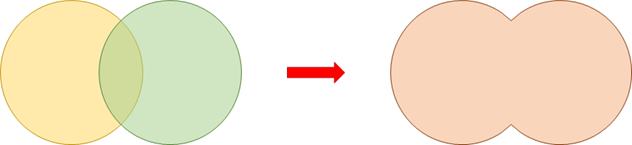

###Sjednocení - UNION ALL

Výsledek obou operací bude sjednocen.

Je důležité mít stejně pojmenované sloupce ve stejném pořadí.


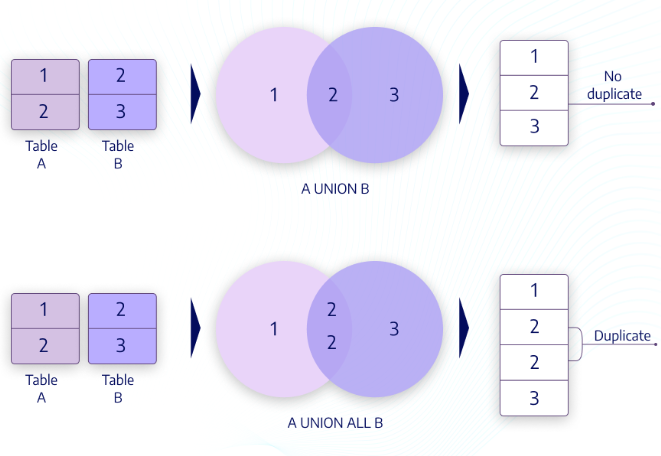

###Průnik - INTERSECT

Výsledek bude průnikem obou množin.

Je důležité mít stejně pojmenované sloupce ve stejném pořadí.


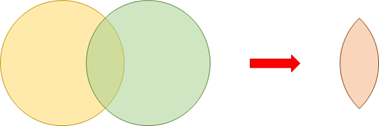

### Rozdíl - EXCEPT

Výsledek jsou unikátní záznamy, které jsou v první a ne ve druhé.

Není komutativní, podobně jako odečítání.


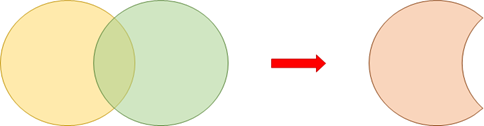

##Úkol 1

Sjednoťe kraje a okresy do jedné množiny. 

Tu následně seřaďte dle kódu vzestupně.

In [ ]:

SELECT *
FROM (
    SELECT code, name, 'region' AS country_part
    FROM czechia_region
    UNION
    SELECT code, name, 'district' AS country_part
    FROM czechia_district
) AS country_parts
ORDER BY code;



#Pohledy (VIEW)

Pohled (anglicky View) je databázový objekt, který uživateli poskytuje data ve stejné podobě jako tabulka. 


Na rozdíl od tabulky, kde jsou data přímo uložena, obsahuje pohled pouze předpis, jakým způsobem mají být data získána z tabulek a jiných pohledů.
základní rozdíly v chování tabulky a pohledu:
* Data tabulky lze přímo modifikovat pomocí příkazů DML SQL (INSERT, UPDATE, DELETE). Data poskytovaná pohledem nelze obecně vzato přímo modifikovat - výsledek, který pohled poskytuje, se změní v .případě, že se změní data v tabulkách, ze kterých pohled čerpá.
* Na rozdíl od tabulky pohled nezabírá v paměti téměř žádné místo, protože neobsahuje data, ale pouze předpis pro získání dat (obvykle příkaz SELECT).
*	Získání výsledku především u komplikovanějších pohledů může být časově výrazně náročnější než u přímého přístupu k tabulce, neboť data musí být při každém použití pohledu získána z podkladových pohledů a tabulek (výpočet může být často dost složitý).


##Úkol 1
Vytvořte pohled (VIEW) s ID, jménem, městem a okresem místa poskytování u těch poskytovatelů, kteří jsou z Brna, Prahy nebo Ostravy. 

Pohled pojmenujte `v_healthcare_provider_subset_`**XX**.

In [ ]:
CREATE VIEW v_healthcare_provider_subset_XX AS
    SELECT
        provider_id, name, municipality, district_code
    FROM healthcare_provider
    WHERE 
        municipality IN ('Brno', 'Praha', 'Ostrava');

##Úkol 2
Smažte pohled z databáze.



In [ ]:
DROP VIEW IF EXISTS v_healthcare_provider_subset_XX;

#Temp tabulky

Dočasné tabulky jsou užitečné při zpracování dat, zejména při transformaci, kde jsou přechodné výsledky. 

Lokální # temp tabulka – je přístupná pouze v rámci dané session, tzn vidí ji pouze uživatel vykonávající skript.

Globální ## temp tabulka – je přístupná z různých sessions, to znamená, že s ní mohou pracovat i ostatní uživatelé.

In [ ]:
CREATE TABLE #t_resume_XX (
    date_start date,
    date_end date,
    education varchar(255),
    job varchar(255)
);


SELECT * FROM #t_resume_XX;


DROP TABLE #t_resume_XX;

In [ ]:
# T-SQL 

SELECT 
    TOP 10 
    * 
INTO #t_providers_south_moravia_XX 
FROM healthcare_provider
WHERE region_code = 'CZ064';

#Tvorba tabulek

###Úkol 1 

Vytvořte tabulku `t_providers_south_moravia_`**XX** z tabulky `healthcare_provider` vyberte pouze Jihomoravský kraj.

**XX** - číslo studenta, co je v loginu do databaze.

In [ ]:
# T-SQL 

SELECT 
	TOP 10 
	* 
INTO t_providers_south_moravia_engeto_lektor 
FROM healthcare_provider
WHERE region_code = 'CZ064';

In [ ]:
# SQL - toto nefunguje v MS SQL

CREATE TABLE t_providers_south_moravia_engeto_lektor AS
    SELECT *
    FROM healthcare_provider
    WHERE region_code = 'CZ064'
    LIMIT 10;

###Úkol 2

Vytvořte tabulku `t_resume_`**XX**, kde budou sloupce date_start, date_end, job, education. 

Sloupcům definujte vhodné datové typy.

**XX** - číslo studenta, co je v loginu do databaze.

Datové typy v T-SQL - https://learn.microsoft.com/en-us/sql/t-sql/data-types/data-types-transact-sql?view=sql-server-ver16

In [ ]:
CREATE TABLE t_resume_lektor_engeto (
    date_start date,
    date_end date,
    education varchar(255),
    job varchar(255)
);

Přídáme kontrolu, zda tabulka už neexistuje

In [ ]:
# T-SQL 

IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='t_resume_lektor_engeto' and xtype='U')
CREATE TABLE t_resume_lektor_engeto (
    date_start date,
    date_end date,
    education varchar(255),
    job varchar(255)
);


Ekvivalentní zápis kontroly 

In [ ]:
# T-SQL 

IF OBJECT_ID(N't_resume_lektor_engeto', N'U') IS NULL
CREATE TABLE t_resume_lektor_engeto (
    date_start date,
    date_end date,
    education varchar(255),
    job varchar(255)
);

In [ ]:
# SQL - toto nefunguje v MS SQL

CREATE TABLE IF NOT EXISTS t_resume_lektor_engeto (
    date_start date,
    date_end date,
    education varchar(255),
    job varchar(255)
);

#Vkládání dat do tabulky

###Úkol 1

Do tabulky `t_resume_`**XX**, kterou jste vytvořili v minulé části, vložte záznam se svým současným zaměstnáním nebo studiem.


In [ ]:
INSERT INTO t_resume_lektor_engeto
VALUES ('2020-05-01', '2022-04-20', 'VUT', 'Engeto lektor');

###Úkol 2 

Do tabulky `t_resume_`**XX** vložte další záznamy. Zkuste použít více způsobů vkládání.

*Poznámka*: Pokud nechcete uvádět skutečné informace, klidně si vytvořte své alter ego :)

In [ ]:
INSERT INTO t_resume_lektor_engeto (date_start, education)
VALUES ('2020-09-01', 'OR with Data Science');

INSERT INTO t_resume_lektor_engeto
VALUES ('2019-06-01', '2020-08-31', null, 'výzkumník v Seznam.cz');

INSERT INTO t_resume_lektor_engeto
VALUES ('2012-09-01', '2015-05-31', 'bakalář ekonomie', null);

#Úprava tabulek

###Úkol 1 

K tabulce `t_resume_`**XX** přidejte sloupec `institution` - typ VARCHAR(255).

In [ ]:

ALTER TABLE t_resume_lektor_engeto ADD institution VARCHAR(255);


###Úkol 2

Do tabulky `t_resume_`**XX** doplňte informace o tom, v jaké firmě nebo škole jste v daný čas působili (sloupec institution).

In [ ]:

UPDATE t_resume_lektor_engeto
SET institution = 'Engeto Academy'
WHERE date_start = '2020-05-01';


A z tabulky můžeme aji mazat

In [ ]:
DELETE FROM t_resume_lektor_engeto
WHERE date_start = '2020-05-01';

###Úkol 3

Přejmenujte v tabulce `t_resume_XX` sloupec `job` na sloupec `new_job` a zase zpět.

In [ ]:
# T-SQL 

EXEC sp_rename 't_resume_lektor_engeto.job', 'new_job', 'COLUMN';

EXEC sp_rename 't_resume_lektor_engeto.new_job', 'job', 'COLUMN';

In [ ]:
# SQL - toto nefunguje v MS SQL

ALTER TABLE t_resume_lektor_engeto RENAME COLUMN job TO new_job;

###Úkol 4

Z tabulky `t_resume_`**XX** odstraňte sloupce `education` a `job`.

In [ ]:
ALTER TABLE t_resume_lektor_engeto DROP COLUMN education;

ALTER TABLE t_resume_lektor_engeto DROP COLUMN job;

# Smazání tabulky

Smažeme celou tabulku `t_resume_`**XX**.

In [ ]:
DROP TABLE IF EXISTS t_resume_lektor_engeto;

# IF EXISTS lze použít od verze SQL Serveru 2016

Smazání tabulky `t_providers_south_moravia_`**XX**

In [ ]:
DROP TABLE IF EXISTS t_providers_south_moravia_engeto_lektor;

#Komunikace s DBMS a obnova databáze ze zálohy

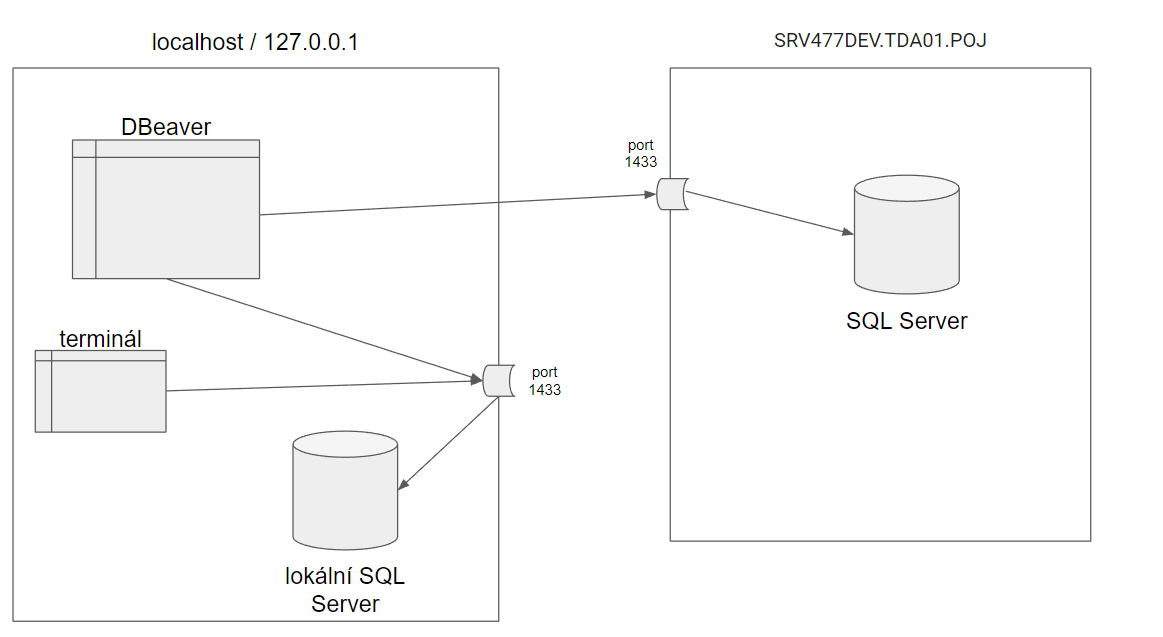

##Obnova ze zálohy

Databázi můžeme celou/častečně zálohovat (dump / backup).

Následně ji můžeme znovu obnovit (restore).

Můžeme provést prostřednictvím DBeaver nebo SQL Server Management Studio (SSMS).



# UPOZORNĚNÍ

---



Při práci v DBeaveru ukončujte průběžně connections do dtb, která nepotřebujete.

Před ukončením DBeaveru rovněž ukončete všechna connections.

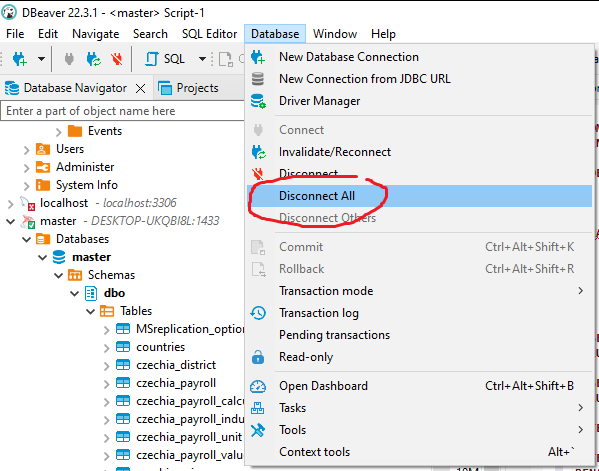